In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data50.csv',index_col=0)

In [3]:
data.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
37,44069.95,51283.14,197029.42,California,89949.14
29,65605.48,153032.06,107138.38,New York,101004.64
42,23640.93,96189.63,148001.11,California,71498.49
18,91749.16,114175.79,294919.57,Florida,124266.90
11,100671.96,91790.61,249744.55,California,144259.40


In [4]:
# check for missing values
data.isnull().sum().sort_values(ascending=False)

Profit             0
State              0
Marketing Spend    0
Administration     0
R&D Spend          0
dtype: int64

In [5]:
# Table of Missing values
missing= data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count())
total= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
print(total)

                 Total  Percent
Administration       0      0.0
Marketing Spend      0      0.0
Profit               0      0.0
R&D Spend            0      0.0
State                0      0.0


E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [6]:
# Get all the categorical variables
categorical= data.select_dtypes(include=[np.object])
categorical.sample(5)

,State
44,California
12,Florida
21,New York
27,New York
3,New York


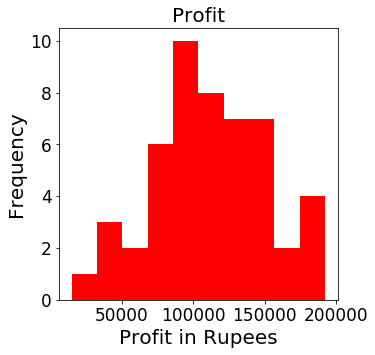

In [7]:
# Histogram of target variable
plt.figure(figsize=(5,5))
plt.hist(data["Profit"],color="red")
plt.title("Profit", size=20)
plt.ylabel("Frequency", size=20)
plt.xlabel("Profit in Rupees", size=20)
plt.tick_params(labelsize=17)
# plt.tick_params(labelsize=20)
# ax.xaxis.set_tick_params(labelsize=20)
# ax.yaxis.set_tick_params(labelsize=20)
plt.show()

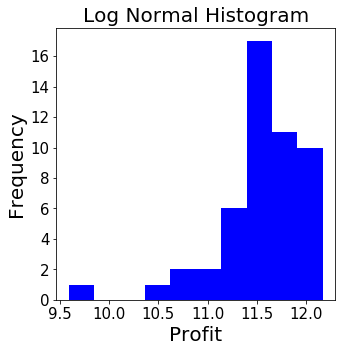

In [8]:
# Log normal histogram
target= np.log(data["Profit"])
plt.figure(figsize=(5,5))
plt.hist(target, color="blue")
plt.xlabel("Profit", size=20)
plt.ylabel("Frequency", size=20)
plt.title("Log Normal Histogram", size=20)
plt.tick_params(labelsize=15)
plt.show()

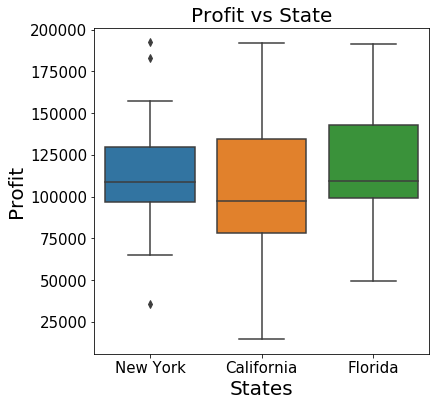

In [9]:
# Boxplot of Profit and Marketing spend
plt.figure(figsize=(6,6))
sns.boxplot(y="Profit", x="State", data=data)
plt.xlabel("States", size=20)
plt.ylabel("Profit", size=20)
plt.title("Profit vs State", size=20)
plt.tick_params(labelsize=15)
plt.show()

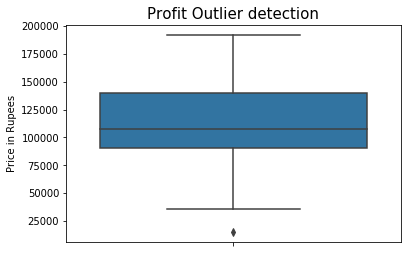

In [10]:
# Outlier detection
# plt.figure(figsize=(12,6))
sns.boxplot(data["Profit"],orient= "v")
plt.title("Profit Outlier detection", size=15)
plt.xlabel("", size=15)
plt.ylabel("Price in Rupees")
plt.show()

In [11]:
#Remove outlier
#data[data["Profit"] < 25000]
data.drop(data[data["Profit"] < 20000].index)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
# State is a categorical varible which we need to convert to numeric
data["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [19]:
# Split the data into training and test set
X = data.iloc[:, :-2].values
y = data.iloc[:, 4].values

In [20]:
X.shape

(50, 3)

In [21]:
X=X[:,1:]

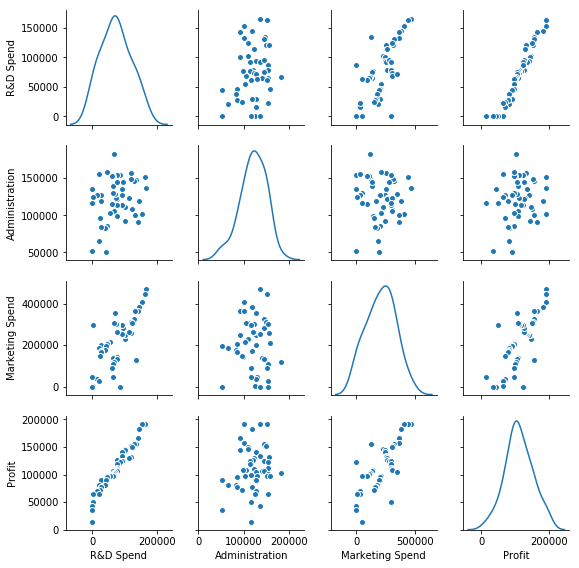

In [22]:
# Pairplot of numeric variables
columns= ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
sns.pairplot(data[columns],size=2, kind="scatter", diag_kind="kde")
plt.show()

In [23]:
# Split data into training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)

In [25]:
# rmse on train set
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
r2=r2_score(Y_test,y_pred)
print("R2 score: {}".format(r2))

Root Mean Squared Error: 31020.071177180747
R2 score: 0.3937345527145165


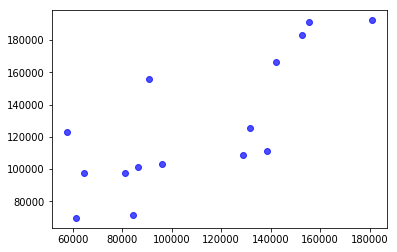

In [26]:
plt.scatter(y_pred,Y_test,alpha=0.7,color='b')
plt.show()

# After Applying OneHotEncoding there is change in the scores 

In [28]:
X = data.iloc[:, :-1].values
y=data.iloc[:,4]

In [29]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder= LabelEncoder()
X[:,3]= labelencoder.fit_transform(X[:, 3])

onehotencoder= OneHotEncoder(categorical_features=[3])
X= onehotencoder.fit_transform(X).toarray()

In [30]:
# Split data into training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)

In [32]:
# rmse on train set
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
r2=r2_score(Y_test,y_pred)
print("R2 score: {}".format(r2))

Root Mean Squared Error: 6246.578410351991
R2 score: 0.9754154859052265


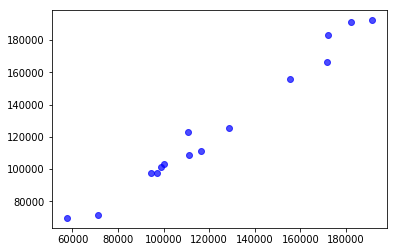

In [33]:
plt.scatter(y_pred,Y_test,alpha=0.7,color='b')
plt.show()